# Task3 特征工程
对于特征进行进一步分析，并对于数据进行处理

完成对于特征工程的分析，并对于数据进行一些图表或者文字总结并打卡。

## 3.1特征工程目标


将数据转换为能更好地表示潜在问题的特征，从而增强数据的表达,提高机器学习的性能。

## 3.2特征工程内容

常见特征工程

*1.异常处理

- 通过箱线图或3-Sigma分析删除异常值
- BOX-COX转换（处理有偏分布）
-  广义幂变换，让数据满足线性模型的基本假定，即线性、正态性及方差齐性。
- 长尾截断

*2.特征归一化/标准化

- 标准化（转换为标准正态分布）
- 归一化（转换到[0,1]区间）
- 针对幂律分布，可以采用公式

*3.数据分桶（类似分类/分组，将连续变量离散化，将多状态的离散变量合并成少状态。）

- 等频分桶
- 等距分桶
-   Best-KS分桶（类似利用基尼系数进行二分类） 

- 卡方分桶（依赖于卡方检验，具有最小卡方值的相邻区间合并在一起）

*4.缺失值处理

- 不处理（针对类似XGBoost等树模型）
- 删除（缺失数据太多）
-   差值补全，均值/中位数/众数/建模预测/多重插补/压缩感知补全/矩阵补全等
- 分箱（缺失值一个箱）

*5.特征构造

- 构造统计量特征，包括计数、求和、比例、标准差等
-   时间特征，包括相对时间和绝对时间，节假日，双休日
-   地理信息，包括分箱、分布编码等方法
-   非线性变换，包括log、平方、根号
-  特征组合，特征交叉
-  仁者见仁智者见智

*6.特征筛选

- 过滤式（filter）：现对数据进行特征选择，然后再训练学习器，常见的方法有Relief/方差选择法/相关系数法/卡方检验法/互信息法
-   包裹式（wrapper）：直接把最终要使用的学习器的性能作为特征子集的评价准则，常见方法有LVM（Las Vegas Wrapper)
- 嵌入式（embedding):结合过滤式和包裹式，学习器训练过程中自动进行了特征选择，常见的有lasso

*7.降维

- PCA/LDA/ICA
-  特征选择也是一种降维




## 3.3代码部分

### 3.3.1导入库和数据

In [1]:
## 基础工具
# 用于数据操作的pandas和numpy
import numpy as np
import pandas as pd
#统计包
import scipy.stats as st
from scipy.special import jn

import warnings
warnings.filterwarnings('ignore')
# 可视化工具包
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']#设置中文字体
pd.set_option('display.max_columns',60) #设置最大显示的列数


In [2]:
import os
os.chdir(r"C:\Users\Thinkpad\Desktop\datamining")
## 1) 载入训练集和测试集；
Train_data = pd.read_csv('used_car_train_20200313.csv', sep=' ')
TestA_data = pd.read_csv('used_car_testA_20200313.csv', sep=' ')

In [3]:
print('Train data shape:',Train_data.shape)
Train_data.head().append(Train_data.tail())

Train data shape: (150000, 31)


,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,seller,offerType,creatDate,price,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,0.0,1046,0,0,20160404,1850,43.357796,3.966344,0.050257,2.159744,1.143786,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,-,4366,0,0,20160309,3600,45.305273,5.236112,0.137925,1.380657,-1.422165,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,0.0,2806,0,0,20160402,6222,45.978359,4.823792,1.319524,-0.998467,-0.996911,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,0.0,434,0,0,20160312,2400,45.687478,4.492574,-0.050616,0.883600,-2.228079,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,0.0,6977,0,0,20160313,5200,44.383511,2.031433,0.572169,-1.571239,2.246088,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482
149995,149995,163978,20000607,121.0,10,4.0,0.0,1.0,163,15.0,0.0,4576,0,0,20160327,5900,45.316543,-3.139095,-1.269707,-0.736609,-1.505820,0.280264,0.000310,0.048441,0.071158,0.019174,1.988114,-2.983973,0.589167,-1.304370,-0.302592
149996,149996,184535,20091102,116.0,11,0.0,0.0,0.0,125,10.0,0.0,2826,0,0,20160312,9500,45.972058,-3.143764,-0.023523,-2.366699,0.698012,0.253217,0.000777,0.084079,0.099681,0.079371,1.839166,-2.774615,2.553994,0.924196,-0.272160
149997,149997,147587,20101003,60.0,11,1.0,1.0,0.0,90,6.0,0.0,3302,0,0,20160328,7500,44.733481,-3.105721,0.595454,-2.279091,1.423661,0.233353,0.000705,0.118872,0.100118,0.097914,2.439812,-1.630677,2.290197,1.891922,0.414931
149998,149998,45907,20060312,34.0,10,3.0,1.0,0.0,156,15.0,0.0,1877,0,0,20160401,4999,45.658634,-3.204785,-0.441680,-1.179812,0.620680,0.256369,0.000252,0.081479,0.083558,0.081498,2.075380,-2.633719,1.414937,0.431981,-1.659014
149999,149999,177672,19990204,19.0,28,6.0,0.0,1.0,193,12.5,0.0,235,0,0,20160305,4700,45.536383,-3.200326,-1.612893,-0.067144,-1.396166,0.284475,0.000000,0.040072,0.062543,0.025819,1.978453,-3.179913,0.031724,-1.483350,-0.342674


In [4]:
print('TestA_data shape:',TestA_data.shape)
TestA_data.head().append(TestA_data.tail())

TestA_data shape: (50000, 30)


,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,seller,offerType,creatDate,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,150000,66932,20111212,222.0,4,5.0,1.0,1.0,313,15.0,0.0,1440,0,0,20160329,49.593127,5.246568,1.001130,-4.122264,0.737532,0.264405,0.121800,0.070899,0.106558,0.078867,-7.050969,-0.854626,4.800151,0.620011,-3.664654
1,150001,174960,19990211,19.0,21,0.0,0.0,0.0,75,12.5,1.0,5419,0,0,20160404,42.395926,-3.253950,-1.753754,3.646605,-0.725597,0.261745,0.000000,0.096733,0.013705,0.052383,3.679418,-0.729039,-3.796107,-1.541230,-0.757055
2,150002,5356,20090304,82.0,21,0.0,0.0,0.0,109,7.0,0.0,5045,0,0,20160308,45.841370,4.704178,0.155391,-1.118443,-0.229160,0.260216,0.112081,0.078082,0.062078,0.050540,-4.926690,1.001106,0.826562,0.138226,0.754033
3,150003,50688,20100405,0.0,0,0.0,0.0,1.0,160,7.0,0.0,4023,0,0,20160325,46.440649,4.319155,0.428897,-2.037916,-0.234757,0.260466,0.106727,0.081146,0.075971,0.048268,-4.864637,0.505493,1.870379,0.366038,1.312775
4,150004,161428,19970703,26.0,14,2.0,0.0,0.0,75,15.0,0.0,3103,0,0,20160309,42.184604,-3.166234,-1.572058,2.604143,0.387498,0.250999,0.000000,0.077806,0.028600,0.081709,3.616475,-0.673236,-3.197685,-0.025678,-0.101290
49995,199995,20903,19960503,4.0,4,4.0,0.0,0.0,116,15.0,0.0,3219,0,0,20160320,45.621391,5.958453,-0.918571,0.774826,-2.021739,0.284664,0.130044,0.049833,0.028807,0.004616,-5.978511,1.303174,-1.207191,-1.981240,-0.357695
49996,199996,708,19991011,0.0,0,0.0,0.0,0.0,75,15.0,0.0,1857,0,0,20160329,43.935162,4.476841,-0.841710,1.328253,-1.292675,0.268101,0.108095,0.066039,0.025468,0.025971,-3.913825,1.759524,-2.075658,-1.154847,0.169073
49997,199997,6693,20040412,49.0,1,0.0,1.0,1.0,224,15.0,0.0,3452,0,0,20160305,46.537137,4.170806,0.388595,-0.704689,-1.480710,0.269432,0.105724,0.117652,0.057479,0.015669,-4.639065,0.654713,1.137756,-1.390531,0.254420
49998,199998,96900,20020008,27.0,1,0.0,0.0,1.0,334,15.0,0.0,1998,0,0,20160404,46.771359,-3.296814,0.243566,-1.277411,-0.404881,0.261152,0.000490,0.137366,0.086216,0.051383,1.833504,-2.828687,2.465630,-0.911682,-2.057353
49999,199999,193384,20041109,166.0,6,1.0,NaN,1.0,68,9.0,0.0,3276,0,0,20160322,43.731010,-3.121867,0.027348,-0.808914,2.116551,0.228730,0.000300,0.103534,0.080625,0.124264,2.914571,-1.135270,0.547628,2.094057,-1.552150


### 3.3.2 异常值处理

#### 缺失值处理
>**思路**

若缺失数据量极少，则直接剔除缺失记录。

若缺失数据量过多（占大多数），则直接剔除此变量。

若缺失数据不占多数（仍能提供有效信息），则做补全。


>需注意有时候不需要处理：

1.使用XGBoost等决策树模型

2.缺失状况传达某种信息（例如：卖家填写车辆信息时，负面车况相关的选项若非必填，则卖家有诱因不填写），故此缺失可视为一种类别

In [5]:
##在EDA阶段我们发现'model'训练集中有一个缺失，且测试集中没有缺失，故删除处理
Train_data =Train_data.dropna(subset=['model'])
Train_data.shape

(149999, 31)

* 合并训练集和测试集放在一起，方便构造特征

In [6]:
# 'train'=1是训练样本 'train'=0是预测样本
#把train_data的price先保存好 最后时候根据'SaleID'再合并
Train_target = Train_data[['price','SaleID']]
del Train_data['price']
Train_data['train']=1
TestA_data['train']=0
data = pd.concat([Train_data, TestA_data], ignore_index=True)


In [7]:
data.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,seller,offerType,creatDate,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,train
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,0.0,1046,0,0,20160404,43.357796,3.966344,0.050257,2.159744,1.143786,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762,1
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,-,4366,0,0,20160309,45.305273,5.236112,0.137925,1.380657,-1.422165,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522,1
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,0.0,2806,0,0,20160402,45.978359,4.823792,1.319524,-0.998467,-0.996911,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963,1
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,0.0,434,0,0,20160312,45.687478,4.492574,-0.050616,0.883600,-2.228079,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699,1
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,0.0,6977,0,0,20160313,44.383511,2.031433,0.572169,-1.571239,2.246088,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482,1


根据EDA发现 'seller','offerType'基本没有提供信息故可以直接剔除，'notRepairedDamage'中含有'-'需要用nan替换转换为数值型

In [8]:
data.drop(['seller','offerType'],axis=1,inplace=True)
data['notRepairedDamage'] = Train_data['notRepairedDamage'].apply(lambda x : float(x) if x!='-' else np.nan)
data['notRepairedDamage']=data['notRepairedDamage'].astype(float)

 'bodyType', 'fuelType', 'gearbox'用众数按补全处理

In [9]:
for cat_f in ['bodyType', 'fuelType', 'gearbox']:
    print(cat_f+'补全前 = {}'.format(data[cat_f].isnull().sum()))
    data[cat_f] = data[cat_f].fillna(data.dropna(subset=[cat_f])[cat_f].mode()[0])
    print(cat_f+'补全后 = {}'.format(data[cat_f].isnull().sum()))

bodyType补全前 = 5919
bodyType补全后 = 0
fuelType补全前 = 11573
fuelType补全后 = 0
gearbox补全前 = 7891
gearbox补全后 = 0


"'notRepairedDamage'" 的缺失可能表示**卖家不愿透露的信息**，且也可能**影响买家购买意愿**，故将其**第三类**，即 notRepairedDamage=2

In [10]:
data['notRepairedDamage'] = data['notRepairedDamage'].fillna(value=2)

In [11]:
missing = data.isnull().sum()
missing = missing[missing > 0]
if missing.any() :
    print("缺失值",missing)
else:
    print("无缺失值")

无缺失值


缺失值已经处理完毕
* 数值型离群值处理

In [12]:
#区分原始特征为数值型 类别型 时间型
numeric_features = ['power', 'kilometer']
numeric_features.extend(['v_'+str(i) for i in range(15)]) 

categorical_features = ['name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox', 
                        'notRepairedDamage','regionCode', ]

time_features = ['regDate', 'creatDate']

# num_data = data[numeric_features]
# cat_data = data[categorical_features]
# time_data = data[time_features]

In [13]:
##这里包装了一个异常值处理的代码，可以随便调用
def outliers_proc(data, col_name, scale=3):
    """
        用于截尾异常值， 默认用box_plot(scale=3)进行清洗
        param:
            data： 接收pandas数据格式
            col_name: pandas列名
            scale: 尺度
    """
    data_col = data[col_name]
    Q1 = data_col.quantile(0.25) # 0.25分位数
    Q3 = data_col.quantile(0.75)  # 0,75分位数
    IQR = Q3 - Q1
    
    data_col[data_col < Q1 - (scale * IQR)] = Q1 - (scale * IQR)
    data_col[data_col > Q3 + (scale * IQR)] = Q3 + (scale * IQR)

    return data[col_name]
 

In [14]:
##改为有极少值大于600 将大于600定为600；
#data['power'] = data['power'].apply(lambda x: 600 if x>600 else x)
#对除了'kilometer'外的数值型特征进行异常值处理(统计学上)
num_fs=numeric_features.copy()
num_fs.remove('kilometer')
# for num_f in num_fs :
#     outliers_proc(data, num_f)
#     print(num_f+"已经完成")
outliers_proc(data, 'power')

0          60
1           0
2         163
3         193
4          68
         ... 
199994    116
199995     75
199996    224
199997    334
199998     68
Name: power, Length: 199999, dtype: int64

### 3.3.3 特征构造

- 时间特征的构造

对于日期类型'regDate'和'creatDate'，将不合理月份为0的先定为缺失值，再根据实际业务衍生出时间差特征 

'used_time'字段为'creatDate'-'regDate'，表示汽车的使用时间 缺失不补
'used_time0'字段为'creatDate'-'regDate'，表示汽车的使用时间 补缺失
'age' 字段为二者的年差 表示车龄 一般15年报废

'age_bin' 对年俩分箱 增强回归的鲁棒性

'Is_scrap' 作为区分是否报废标记


In [15]:
##把错误字段都给他加1个月，然后计算出天数之后在加上30天
# 这里是为了标记一下哪些字段有错误
def regDateFalse(x):
    if str(x)[4:6] == '00':
        return 1
    else: 
        return 0
data['regDateFalse'] = data['regDate'].apply(lambda x: regDateFalse(x))

# 这里是改正错误字段
def changeFalse(x):
    x = str(x)
    if x[4:6] == '00':
        x = x[0:4] + '01' + x[6:]
        x = int(x)
    return x
data['regDate0'] = data['regDate'].apply(lambda x: changeFalse(x))

# 使用时间：data['creatDate'] - data['regDate']，反应汽车使用时间，一般来说价格与使用时间成反比
# 不过要注意，数据里有时间出错的格式，所以我们需要 errors='coerce'
data['used_time0'] = (pd.to_datetime(data['creatDate'], format='%Y%m%d') - 
                            pd.to_datetime(data['regDate0'], format='%Y%m%d')).dt.days

# 修改错误
# 但是需要加上那一个月
data.loc[data.regDateFalse==1, 'used_time0'] += 30

# 删除标记列
del data['regDateFalse']
del data['regDate0']
data['age'] =(data['used_time0']/365).round(decimals=1)
#data['age']=data['age'].round(decimals=2)

In [16]:
##对于不合理的日期替换为缺失值 
data['regDate'] =data['regDate'].apply(lambda x : x if str(x)[4:6]!='00' else np.nan)
data['used_days'] = (pd.to_datetime(data['creatDate'], format='%Y%m%d', errors='coerce') - 
                            pd.to_datetime(data['regDate'], format='%Y%m%d', errors='coerce')).dt.days

In [17]:
bins = [0, 3, 5, 10, 15,20,30]
data['age_bin'] = pd.cut(data['age'], bins, labels=False)
data['Is_scrap'] = data['age'].apply(lambda x: 1 if x>=15 else 0)
# 这样时间特征构造完毕，删除日期了
del data['regDate']
del data['creatDate']

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199999 entries, 0 to 199998
Data columns (total 32 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             199999 non-null  int64  
 1   name               199999 non-null  int64  
 2   model              199999 non-null  float64
 3   brand              199999 non-null  int64  
 4   bodyType           199999 non-null  float64
 5   fuelType           199999 non-null  float64
 6   gearbox            199999 non-null  float64
 7   power              199999 non-null  int64  
 8   kilometer          199999 non-null  float64
 9   notRepairedDamage  199999 non-null  float64
 10  regionCode         199999 non-null  int64  
 11  v_0                199999 non-null  float64
 12  v_1                199999 non-null  float64
 13  v_2                199999 non-null  float64
 14  v_3                199999 non-null  float64
 15  v_4                199999 non-null  float64
 16  v_

- 类别型特征构造

'regionCode' 从邮编中提取城市信息，相当于加入了先验知识

In [19]:
data['city'] = data['regionCode'].apply(lambda x : str(x)[-3:])
data['city']=data['city'].astype(float)

"brand"按品牌计算统计指标做衍生特征
车身类型：豪华轿车：0，微型车：1，厢型车：2，大巴车：3，敞篷车：4，双门汽车：5，商务车：6，搅拌车：7

乘用车  1.0, 2.0，

商用车 3.0, 5.0,6.0,7.0

豪车 0.0,4.0

In [20]:
self_car = [1.0,2.0]  
com_car = [3.0, 5.0, 6.0,7.0]   
GL_car = [0.0, 4.0]

def class_bodyType(x):
    if x in self_car:
        return 0
    elif x in com_car:
        return 1
    else:
        return 2

data['car_class'] = data['bodyType'].apply(lambda x : class_bodyType(x))


'fuelType'  新能源车和燃油车分开 

燃油类型：汽油：0，柴油：1，液化石油气：2，天然气：3，混合动力：4，其他：5，电动：6

燃油车  0.0, 1.0, 2.0, 3.0

新能源车 4.0，5.0，6.0

In [21]:
is_fuel = [0.0, 1.0, 2.0, 3.0]
data['is_fuel'] = data['fuelType'].apply(lambda x: 1 if x in is_fuel else 0)

对'gearbox' 'brand' 'fuelType'分别增加统计衍生特征变量

In [22]:
train_data_gearbox=data[data['train']==1].copy()
train_data_gearbox['gearbox'] = data[data['train']==1]['gearbox']
train_data_gearbox['price'] = Train_target['price']
train_gb = train_data_gearbox.groupby('gearbox')
all_info = {}
for kind, kind_data in train_gb:
    info = {}
    kind_data = kind_data[kind_data['price'] > 0]
    info['gearbox_count'] = len(kind_data)
    info['gearbox_price_max'] = kind_data.price.max()
    info['gearbox_price_median'] = kind_data.price.median()
    info['gearbox_price_min'] = kind_data.price.min()
    info['gearbox_std'] = kind_data.price.std()
    info['gearbox_price_average'] = round(kind_data.price.sum() / (len(kind_data) + 1), 2)
    all_info[kind] = info

gearbox_fe = pd.DataFrame(all_info).T.reset_index().rename(columns={"index": "gearbox"})

data = data.merge(gearbox_fe, how='left', on='gearbox')


In [23]:
train_data_brand=data[data['train']==1].copy()
train_data_brand['brand'] = data[data['train']==1]['brand']
train_data_brand['price'] = Train_target['price']
price_stats_grouped_by_brand = train_data_brand.groupby(['brand'])['price'].agg(['median','mean','size','std','max','min']).reset_index()
price_stats_grouped_by_brand.columns = ['brand',
                                        'brand_price_median',
                                        'brand_price_mean',
                                        'brand_price_size',
                                        'brand_price_std',
                                        'brand_price_max',
                                        'brand_price_min']
price_stats_grouped_by_brand.head()
data = data.merge(price_stats_grouped_by_brand, how='left', on='brand')
data

,SaleID,name,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,train,used_time0,age,used_days,age_bin,Is_scrap,city,car_class,is_fuel,gearbox_count,gearbox_price_max,gearbox_price_median,gearbox_price_min,gearbox_std,gearbox_price_average,brand_price_median,brand_price_mean,brand_price_size,brand_price_std,brand_price_max,brand_price_min
0,0,736,30.0,6,1.0,0.0,0.0,60,12.5,0.0,1046,43.357796,3.966344,0.050257,2.159744,1.143786,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762,1,4385,12.0,4385.0,3,0,46.0,0,1,117603.0,99999.0,3000.0,11.0,7116.825632,5607.02,2800.0,5420.114417,10217,7193.290018,99900.0,13.0
1,1,2262,40.0,1,2.0,0.0,0.0,0,15.0,2.0,4366,45.305273,5.236112,0.137925,1.380657,-1.422165,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522,1,4757,13.0,4757.0,3,0,366.0,0,1,117603.0,99999.0,3000.0,11.0,7116.825632,5607.02,3899.0,6737.987966,13794,8098.164249,97500.0,15.0
2,2,14874,115.0,15,1.0,0.0,0.0,163,12.5,0.0,2806,45.978359,4.823792,1.319524,-0.998467,-0.996911,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963,1,4382,12.0,4382.0,3,0,806.0,0,1,117603.0,99999.0,3000.0,11.0,7116.825632,5607.02,4900.0,7156.951303,1458,7964.169199,89000.0,50.0
3,3,71865,109.0,10,0.0,0.0,1.0,193,15.0,0.0,434,45.687478,4.492574,-0.050616,0.883600,-2.228079,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699,1,7125,19.5,7125.0,4,1,434.0,2,1,32395.0,99999.0,3950.0,13.0,8659.905460,7069.96,3790.0,6556.858095,14249,7859.662025,89000.0,15.0
4,4,111080,110.0,5,1.0,0.0,0.0,68,5.0,0.0,6977,44.383511,2.031433,0.572169,-1.571239,2.246088,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482,1,1531,4.2,1531.0,1,0,977.0,0,1,117603.0,99999.0,3000.0,11.0,7116.825632,5607.02,2980.0,5287.742122,4665,7006.928999,99999.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199994,199995,20903,4.0,4,4.0,0.0,0.0,116,15.0,2.0,3219,45.621391,5.958453,-0.918571,0.774826,-2.021739,0.284664,0.130044,0.049833,0.028807,0.004616,-5.978511,1.303174,-1.207191,-1.981240,-0.357695,0,7261,19.9,7261.0,4,1,219.0,2,1,117603.0,99999.0,3000.0,11.0,7116.825632,5607.02,3800.0,6614.648503,16737,7788.185301,99999.0,12.0
199995,199996,708,0.0,0,0.0,0.0,0.0,75,15.0,2.0,1857,43.935162,4.476841,-0.841710,1.328253,-1.292675,0.268101,0.108095,0.066039,0.025468,0.025971,-3.913825,1.759524,-2.075658,-1.154847,0.169073,0,6014,16.5,6014.0,4,1,857.0,2,1,117603.0,99999.0,3000.0,11.0,7116.825632,5607.02,3250.0,5788.239398,31480,7156.300213,99999.0,13.0
199996,199997,6693,49.0,1,0.0,1.0,1.0,224,15.0,2.0,3452,46.537137,4.170806,0.388595,-0.704689,-1.480710,0.269432,0.105724,0.117652,0.057479,0.015669,-4.639065,0.654713,1.137756,-1.390531,0.254420,0,4345,11.9,4345.0,3,0,452.0,2,1,32395.0,99999.0,3950.0,13.0,8659.905460,7069.96,3899.0,6737.987966,13794,8098.164249,97500.0,15.0
199997,199998,96900,27.0,1,0.0,0.0,1.0,334,15.0,2.0,1998,46.771359,-3.296814,0.243566,-1.277411,-0.404881,0.261152,0.000490,0.137366,0.086216,0.051383,1.833504,-2.828687,2.465630,-0.911682,-2.057353,0,5230,14.3,NaN,3,0,998.0,2,1,32395.0,99999.0,3950.0,13.0,8659.905460,7069.96,3899.0,6737.987966,13794,8098.164249,97500.0,15.0


In [24]:
#剔除无用的变量，并把gearbox， car_class is_fuel等独热一下， 这个不能太早，构造晚了统计特征之后再独热
data = pd.get_dummies(data, columns=['gearbox', 'car_class', 'is_fuel', 'notRepairedDamage'])
del data['bodyType']
del data['fuelType']
del data[ 'model']
del data['name']
del data['brand']

- 数值型特征构造

对power采用分箱

In [25]:
# 数据分桶 以 power 为例
# 这时候我们的缺失值也进桶了，
# 为什么要做数据分桶呢，原因有很多，= =
# 1. 离散后稀疏向量内积乘法运算速度更快，计算结果也方便存储，容易扩展；
# 2. 离散后的特征对异常值更具鲁棒性，如 age>30 为 1 否则为 0，对于年龄为 200 的也不会对模型造成很大的干扰；
# 3. LR 属于广义线性模型，表达能力有限，经过离散化后，每个变量有单独的权重，这相当于引入了非线性，能够提升模型的表达能力，加大拟合；
# 4. 离散后特征可以进行特征交叉，提升表达能力，由 M+N 个变量编程 M*N 个变量，进一步引入非线形，提升了表达能力；
# 5. 特征离散后模型更稳定，如用户年龄区间，不会因为用户年龄长了一岁就变化

# 当然还有很多原因，LightGBM 在改进 XGBoost 时就增加了数据分桶，增强了模型的泛化性
data['power_bin'] = pd.cut(data['power'],15, labels=False)

data[['power','power_bin']].drop_duplicates()

,power,power_bin
0,60,2
1,0,0
2,163,6
3,193,7
4,68,2
...,...,...
147148,368,14
147988,316,12
151763,374,14
153798,317,12


对'kilometer'归一化和分箱

In [26]:
# 分成5段
bins = [0, 3, 6,9,12,15]
data['kil_bin'] = pd.cut(data['kilometer'], bins, labels=False)

In [27]:
data['kilometer_s']=((data['kilometer'] - np.min(Train_data['kilometer'])) / 
                        (np.max(Train_data['kilometer']) - np.min(Train_data['kilometer'])))

In [28]:
data['power_bin'].unique()

array([ 2,  0,  6,  7,  4,  5,  3,  9,  1,  8, 12, 14, 11, 13, 10],
      dtype=int64)

将特征和price合并输出到文件备用

In [29]:
data = data.merge(Train_target, how='left', on='SaleID')


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199999 entries, 0 to 199998
Data columns (total 52 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   SaleID                 199999 non-null  int64  
 1   power                  199999 non-null  int64  
 2   kilometer              199999 non-null  float64
 3   regionCode             199999 non-null  int64  
 4   v_0                    199999 non-null  float64
 5   v_1                    199999 non-null  float64
 6   v_2                    199999 non-null  float64
 7   v_3                    199999 non-null  float64
 8   v_4                    199999 non-null  float64
 9   v_5                    199999 non-null  float64
 10  v_6                    199999 non-null  float64
 11  v_7                    199999 non-null  float64
 12  v_8                    199999 non-null  float64
 13  v_9                    199999 non-null  float64
 14  v_10                   199999 non-nu

In [31]:
data.to_csv('futures_select_before.csv', index=0)

### 3.3.4 特征选择（去除共线特征）

In [ ]:
data = pd.read_csv('futures_select_before.csv')

##### 1） 过滤式


主要思想: 对每一维特征“打分”，即给每一维的特征赋予权重，这样的权重就代表着该特征的重要性，然后依据权重排序。先进行特征选择，然后去训练学习器，所以特征选择的过程与学习器无关。相当于先对特征进行过滤操作，然后用特征子集来训练分类器。

主要方法：

移除低方差的特征；
相关系数排序，分别计算每个特征与输出值之间的相关系数，设定一个阈值，选择相关系数大于阈值的部分特征；
利用假设检验得到特征与输出值之间的相关性，方法有比如卡方检验、t检验、F检验等。
互信息，利用互信息从信息熵的角度分析相关性。
trick1: 对于数值型特征，方差很小的特征可以不要，因为太小没有什么区分度，提供不了太多的信息，对于分类特征，也是同理，取值个数高度偏斜的那种可以先去掉。
trick2:根据与目标的相关性等选出比较相关的特征（当然有时候根据字段含义也可以选）
trick3: 卡方检验一般是检查离散变量与离散变量的相关性，当然离散变量的相关性信息增益和信息增益比也是不错的选择（可以通过决策树模型来评估来看）， person系数一般是查看连续变量与连续变量的线性相关关系。

In [32]:
data.columns

Index(['SaleID', 'power', 'kilometer', 'regionCode', 'v_0', 'v_1', 'v_2',
       'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12',
       'v_13', 'v_14', 'train', 'used_time0', 'age', 'used_days', 'age_bin',
       'Is_scrap', 'city', 'gearbox_count', 'gearbox_price_max',
       'gearbox_price_median', 'gearbox_price_min', 'gearbox_std',
       'gearbox_price_average', 'brand_price_median', 'brand_price_mean',
       'brand_price_size', 'brand_price_std', 'brand_price_max',
       'brand_price_min', 'gearbox_0.0', 'gearbox_1.0', 'car_class_0',
       'car_class_1', 'car_class_2', 'is_fuel_0', 'is_fuel_1',
       'notRepairedDamage_0.0', 'notRepairedDamage_1.0',
       'notRepairedDamage_2.0', 'power_bin', 'kil_bin', 'kilometer_s',
       'price'],
      dtype='object')

以下代码
* 通过删除所比较的两个特征之一，根据我们为相关系数选择的阈值来移除共线特征
* 它还打印其删除的相关性，以便我们看到调整阈值的效果。

我们将阈值设置为0.9，如果特征之间的相关系数超过该值，则删除一对特征中的一个。
（仅针对v_系列特征进行筛选）

In [33]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
       删除数据帧中相关系数大于阈值的共线特征。 删除共线特征可以帮助模型泛化并提高模型的可解释性。
        
    Inputs: 
        阈值：删除任何相关性大于此值的特征
    
    Output: 
        仅包含非高共线特征的数据帧
    '''
    
    # 在数据副本上进行操作
    x = x.copy()
    
    # 仅对v_系列特征进行处理
    x_numeric = x[['v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7',
                    'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14']]
    
    
    # 计算相关性矩阵
    corr_matrix = x_numeric.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # 迭代相关性矩阵并比较相关性
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # 如果相关性超过阈值
            if val >= threshold:
                # 打印有相关性的特征和相关值
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 3))
                drop_cols.append(col.values[0])

    # 删除每对相关列中的一个
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    
    # 将得分添加回数据

               
    return x

In [34]:
data = remove_collinear_features(data, threshold=0.9)

v_5 | v_2 | 0.921
v_6 | v_1 | 0.999
v_7 | v_2 | 0.973
v_7 | v_5 | 0.939
v_8 | v_3 | 0.934
v_9 | v_4 | 0.963
v_10 | v_1 | 0.922
v_10 | v_6 | 0.918
v_13 | v_4 | 0.935


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199999 entries, 0 to 199998
Data columns (total 45 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   SaleID                 199999 non-null  int64  
 1   power                  199999 non-null  int64  
 2   kilometer              199999 non-null  float64
 3   regionCode             199999 non-null  int64  
 4   v_0                    199999 non-null  float64
 5   v_1                    199999 non-null  float64
 6   v_2                    199999 non-null  float64
 7   v_3                    199999 non-null  float64
 8   v_4                    199999 non-null  float64
 9   v_11                   199999 non-null  float64
 10  v_12                   199999 non-null  float64
 11  v_14                   199999 non-null  float64
 12  train                  199999 non-null  int64  
 13  used_time0             199999 non-null  int64  
 14  age                    199999 non-nu

In [36]:
data.to_csv('futures_after_select1.csv', index=0)

##### 2） 包裹式

主要思想：包裹式从初始特征集合中不断的选择特征子集，训练学习器，根据学习器的性能来对子集进行评价，直到选择出最佳的子集。包裹式特征选择直接针对给定学习器进行优化。

主要方法：递归特征消除算法, 基于机器学习模型的特征排序

优缺点：

优点：从最终学习器的性能来看，包裹式比过滤式更好；
缺点：由于特征选择过程中需要多次训练学习器，因此包裹式特征选择的计算开销通常比过滤式特征选择要大得多。
下面，这里整理基于学习模型的特征排序方法，这种方法的思路是直接使用你要用的机器学习算法，针对每个单独的特征和响应变量建立预测模型。其实Pearson相关系数等价于线性回归里的标准化回归系数。假如某个特征和响应变量之间的关系是非线性的，可以用基于树的方法（决策树、随机森林）、或者扩展的线性模型等。基于树的方法比较易于使用，因为他们对非线性关系的建模比较好，并且不需要太多的调试。但要注意过拟合问题，因此树的深度最好不要太大，再就是运用交叉验证。

我们可以用随机森林来跑一下，看看随机森林比较喜欢特征：

In [37]:
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
X = data[data['train']==1].iloc[:, :-1]
Y = data[data['train']==1]['price']
names = data.columns

rf = RandomForestRegressor(n_estimators=20, max_depth=4)
kfold = KFold(n_splits=5, shuffle=True, random_state=7)
scores = []
for column in X.columns:
    print(column)
    tempx = X[column].values.reshape(-1, 1)
    score = cross_val_score(rf, tempx, Y, scoring="r2",
                              cv=kfold)
    scores.append((round(np.mean(score), 3), column))
print(sorted(scores, reverse=True))


SaleID
power
kilometer
regionCode
v_0
v_1
v_2
v_3
v_4
v_11
v_12
v_14
train
used_time0
age
used_days
age_bin
Is_scrap
city
gearbox_count
gearbox_price_max
gearbox_price_median
gearbox_price_min
gearbox_std
gearbox_price_average
brand_price_median
brand_price_mean
brand_price_size
brand_price_std
brand_price_max
brand_price_min
gearbox_0.0
gearbox_1.0
car_class_0
car_class_1
car_class_2
is_fuel_0
is_fuel_1
notRepairedDamage_0.0
notRepairedDamage_1.0
notRepairedDamage_2.0
power_bin
kil_bin
kilometer_s
[(0.757, 'v_0'), (0.749, 'v_3'), (0.603, 'v_12'), (0.467, 'used_time0'), (0.467, 'age'), (0.406, 'v_11'), (0.387, 'power'), (0.36, 'v_2'), (nan, 'used_days'), (0.437, 'age_bin'), (0.358, 'power_bin'), (0.221, 'kilometer_s'), (0.221, 'kilometer'), (0.189, 'kil_bin'), (0.188, 'brand_price_median'), (0.188, 'brand_price_mean'), (0.183, 'brand_price_std'), (0.174, 'brand_price_size'), (0.168, 'Is_scrap'), (0.161, 'brand_price_max'), (0.115, 'v_14'), (0.109, 'gearbox_std'), (0.109, 'gearbox_price

In [38]:
#随机森林喜欢的特征
feature_tree_rand=['v_0','v_3','v_12', 'v_11', 'power','v_2','kilometer', 'brand_price_median','brand_price_mean','brand_price_std',
                  'brand_price_size','brand_price_max', 'Is_scrap']

<Figure size 1440x720 with 0 Axes>

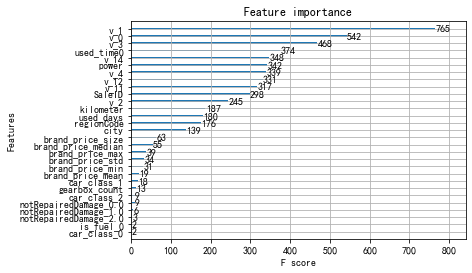

In [39]:
# 下面再用xgboost跑一下
from xgboost import XGBRegressor
from xgboost import plot_importance

xgb = XGBRegressor()
xgb.fit(X, Y)

plt.figure(figsize=(20, 10))
plot_importance(xgb)
plt.show()


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199999 entries, 0 to 199998
Data columns (total 45 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   SaleID                 199999 non-null  int64  
 1   power                  199999 non-null  int64  
 2   kilometer              199999 non-null  float64
 3   regionCode             199999 non-null  int64  
 4   v_0                    199999 non-null  float64
 5   v_1                    199999 non-null  float64
 6   v_2                    199999 non-null  float64
 7   v_3                    199999 non-null  float64
 8   v_4                    199999 non-null  float64
 9   v_11                   199999 non-null  float64
 10  v_12                   199999 non-null  float64
 11  v_14                   199999 non-null  float64
 12  train                  199999 non-null  int64  
 13  used_time0             199999 non-null  int64  
 14  age                    199999 non-nu

In [41]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
data1=data[data['train']==1].copy()
del data1['age_bin']
del data1['age']
del data1['used_days']
X = data1
Y = Train_target
sfs = SFS(RandomForestRegressor(n_estimators=10, max_depth=4), k_features=20, forward=True, floating=False, scoring='r2', cv=0)
sfs.fit(X, Y)
sfs.k_feature_names_ 

('SaleID',
 'power',
 'kilometer',
 'v_0',
 'v_3',
 'v_11',
 'v_14',
 'train',
 'Is_scrap',
 'gearbox_count',
 'gearbox_price_max',
 'gearbox_price_min',
 'brand_price_mean',
 'brand_price_min',
 'gearbox_1.0',
 'car_class_0',
 'is_fuel_0',
 'notRepairedDamage_0.0',
 'power_bin',
 'price')

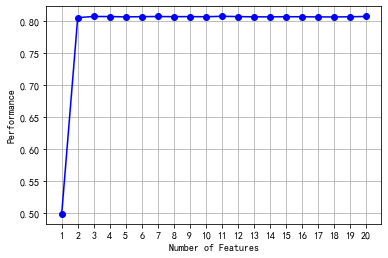

In [42]:
# 画出边际效应
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.grid()
plt.show()

##### 3） 嵌入式

主要思想：在模型既定的情况下学习出对提高模型准确性最好的特征。也就是在确定模型的过程中，挑选出那些对模型的训练有重要意义的特征。

主要方法：简单易学的机器学习算法–岭回归（Ridge Regression），就是线性回归过程加入了L2正则项。

L2正则化在拟合过程中通常都倾向于让权值尽可能小，最后构造一个所有参数都比较小的模型。因为一般认为参 数值小的模型比较简单，能适应不同的数据集，也在一定程度上避免了过拟合现象。可以设想一下对于一个线性 回归方程，若参数很大，那么只要数据偏移一点点，就会对结果造成很大的影响；但如果参数足够小，数据偏移 得多一点也不会对结果造成什么影响，专业一点的说法是『抗扰动能力强』
L1正则化有助于生成一个稀疏权值矩阵，进而可以用于特征选择

In [43]:
from sklearn.linear_model import LinearRegression, Ridge,Lasso
models = [LinearRegression(), Ridge(), Lasso()]
result = dict()
for model in models:
    model_name = str(model).split('(')[0]
    scores = cross_val_score(model, X=X, y=Y, verbose=0, cv=5, scoring='r2')
    result[model_name] = scores

In [44]:
result

{'LinearRegression': array([1., 1., 1., 1., 1.]),
 'Ridge': array([1., 1., 1., 1., 1.]),
 'Lasso': array([1., 1., 1., 1., 1.])}

##### 4）PCA降维技术

我们通过上面的特征选择部分，可以选出更好的分析特征，但是如果这些特征维度仍然很高怎么办？

如果我们的数据特征维度太高，首先计算很麻烦，其次增加了问题的复杂程度，分析起来也不方便。这时候我们就会想是不是再去掉一些特征就好了呢？ 但是这个特征也不是凭自己的意愿去掉的，因为盲目减少数据的特征会损失掉数据包含的关键信息，容易产生错误的结论，对分析不利。

所以我们想找到一个合理的方式，既可以减少我们需要分析的指标，而且尽可能多的保持原来数据的信息，PCA就是这个合理的方式之一。 关于PCA降维技术的原理， 可以参考我的另一篇博客白话机器学习算法理论+实战之PCA降维, 这里只整理如何用， 但要注意一点， 特征选择是从已存在的特征中选取携带信息最多的，选完之后的特征依然具有可解释性，而PCA，将已存在的特征压缩，降维完毕后不是原来特征的任何一个，也就是PCA降维之后的特征我们根本不知道什么含义了

当然，针对这个比赛，也不打算使用PCA降维技术，因为如果做完了特征选择之后，就会发现特征的量不是那么多， 但我在这里用了一下，可以看看效果：


In [45]:
from sklearn.decomposition import PCA

# 然后使用
pca = PCA(n_components=10)
X_new = pca.fit_transform(X)

"""查看PCA的一些属性"""
print(X_new.shape)   # （200000， 10）
print(pca.explained_variance_)    # 属性可以查看降维后的每个特征向量上所带的信息量大小（可解释性方差的大小）
print(pca.explained_variance_ratio_)  # 查看降维后的每个新特征的信息量占原始数据总信息量的百分比
print(pca.explained_variance_ratio_.sum())    # 降维后信息保留量


(149999, 10)
[1.87502498e+09 1.23705498e+09 1.93062647e+08 5.51632830e+07
 5.12679062e+07 3.55538070e+06 2.54859189e+06 1.13479555e+06
 1.21425475e+05 8.31110837e+04]
[5.48409234e-01 3.61815113e-01 5.64671617e-02 1.61342138e-02
 1.49948900e-02 1.03988140e-03 7.45414777e-04 3.31906169e-04
 3.55146478e-05 2.43084153e-05]
0.9999976376841775


In [46]:
# 目前的数据其实已经可以给树模型使用了，所以我们导出一下
# data.to_csv('select_features.csv', index=0)

### 3.4经验总结

参考了 https://tianchi.aliyun.com/notebook-ai/detail?spm=5176.12281978.0.0.6802593aq0tFcY&postId=95501
       https://blog.csdn.net/wuzhongqiang/article/details/105012656

特征工程的主要目的还是在于将数据转换为能更好地表示潜在问题的特征，从而提高机器学习的性能。比如，异常值处理是为了去除噪声，填补缺失值可以加入先验知识等。

特征构造也属于特征工程的一部分，其目的是为了增强数据的表达。

有些比赛的特征是匿名特征，这导致我们并不清楚特征相互直接的关联性，这时我们就只有单纯基于特征进行处理，比如装箱，groupby，agg 等这样一些操作进行一些特征统计，此外还可以对特征进行进一步的 log，exp 等变换，或者对多个特征进行四则运算（如上面我们算出的使用时长），多项式组合等然后进行筛选。由于特性的匿名性其实限制了很多对于特征的处理，当然有些时候用 NN 去提取一些特征也会达到意想不到的良好效果。

对于知道特征含义（非匿名）的特征工程，特别是在工业类型比赛中，会基于信号处理，频域提取，丰度，偏度等构建更为有实际意义的特征，这就是结合背景的特征构建，在推荐系统中也是这样的，各种类型点击率统计，各时段统计，加用户属性的统计等等，这样一种特征构建往往要深入分析背后的业务逻辑或者说物理原理，从而才能更好的找到 magic。

当然特征工程其实是和模型结合在一起的，这就是为什么要为 LR NN 做分桶和特征归一化的原因，而对于特征的处理效果和特征重要性等往往要通过模型来验证。

总的来说，特征工程是一个入门简单，但想精通非常难的一件事。

未完待续